In [57]:
from os import path
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from collections import Counter
import codecs
from nltk.corpus import stopwords
import nltk
import csv
import random
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#!rm -rf dataset/
#!git clone --recursive https://github.com/viik36/dataset.git
raw_dataframe = pd.read_csv("../data/Labelled_tweets_v1.csv",header = None)

In [4]:
# data = open("dataset/Labelled_tweets_v1(1).csv").readlines()
# data[0:10]
tweets = []
data_pd = pd.read_csv("../data/Labelled_tweets_v1.csv")
print(data_pd.head(10))
data_tweet = data_pd['Tweet']
for i in data_tweet:
  j = i.split()
  for k in j:
    tweets.append(k)
    

                                               Tweet      UserHandle Party  \
0  a no of people approach me daily worried abt t...  ArvindKejriwal   AAP   
1  its now revealed that our fms silence on the p...  ArvindKejriwal   AAP   
2  pnb scam started in is going on till today the...  ArvindKejriwal   AAP   
3  would bjp confirm this if true what transpired...  ArvindKejriwal   AAP   
4  bjp insiders telling that niravmodi been a reg...  ArvindKejriwal   AAP   
5  is it possible to believe that he or vijay mal...  ArvindKejriwal   AAP   
6  someone told me today sealing bjp wants to rui...  ArvindKejriwal   AAP   
7  if all state govts central govt and sc togethe...  ArvindKejriwal   AAP   
8  three killings on merchants in one year first ...  ArvindKejriwal   AAP   
9  there is no need to increase house tax in mcd ...  ArvindKejriwal   AAP   

       Issue        Stance  
0        GST  Disagreement  
1   PNB Scam       Neutral  
2   PNB Scam       Neutral  
3   PNB Scam       Neutra

In [5]:
data_pd.head(10)

,Tweet,UserHandle,Party,Issue,Stance
0,a no of people approach me daily worried abt t...,ArvindKejriwal,AAP,GST,Disagreement
1,its now revealed that our fms silence on the p...,ArvindKejriwal,AAP,PNB Scam,Neutral
2,pnb scam started in is going on till today the...,ArvindKejriwal,AAP,PNB Scam,Neutral
3,would bjp confirm this if true what transpired...,ArvindKejriwal,AAP,PNB Scam,Neutral
4,bjp insiders telling that niravmodi been a reg...,ArvindKejriwal,AAP,PNB Scam,Neutral
5,is it possible to believe that he or vijay mal...,ArvindKejriwal,AAP,PNB Scam,Neutral
6,someone told me today sealing bjp wants to rui...,ArvindKejriwal,AAP,FDIPolicy,Neutral
7,if all state govts central govt and sc togethe...,ArvindKejriwal,AAP,FDIPolicy,Neutral
8,three killings on merchants in one year first ...,ArvindKejriwal,AAP,GST,Disagreement
9,there is no need to increase house tax in mcd ...,ArvindKejriwal,AAP,GST,Disagreement


In [6]:
#data_pd.values.tolist()[:,0]

In [7]:
issues_pd = data_pd['Issue']
stance_pd = data_pd['Stance']

In [8]:
issues = []
for iss in issues_pd:
  if iss not in issues:
    issues.append(iss)
    
print(issues)

['GST', 'PNB Scam', 'FDIPolicy', 'Padmavati film screening', 'Cauvery SC Verdict', 'Jallikattu ban', 'GDP growth', 'RightToPrivacy SC Verdict', 'Demonetisation', 'Swacch Bharat', 'Aadhar linking', 'Triple Talaq SC verdict', 'TripleTalaqBill', 'lgp price hike', 'reservation', 'Beef Ban', 'Inflation control', 'nsc and ppf rate cuts', 'Ram Mandir', 'EVM tampering', 'Fodder scam', 'hike in oil prices', 'Rohingyas', 'acchedin']


In [9]:
all_words = tweets
word2cnt = Counter(all_words)
stop_words = ['the','of','in','and','a','is','on','this','all','it','will','for','to','be','with',
              'at','are','u','has','that','by','from', 'as','was','have','its','an','if','been','be','also','should','which']

#issues = ['demonetization', 'gst', 'immigration', 'reservation', 'aadhar']

In [10]:
with codecs.open('vocab_real.csv', 'w', 'utf-8') as fout:
  fout.write("{}{}1000000000\n{}{}1000000000\n{}{}1000000000\n{}{}1000000000\n".format("<PAD>",",", "<UNK>",",", "<S>",",", "</S>",","))
  for word, cnt in word2cnt.most_common(len(word2cnt)):
    if(word not in stop_words):
      fout.write("{}{}{} \n".format(word,',',cnt))

In [11]:
#o = codecs.open("vocab.csv").readlines()
word_counts = pd.read_csv("vocab_real.csv",header=None)

In [12]:
#len(vocab)
word_counts[50:60]

,0,1
50,only,322
51,what,320
52,his,317
53,new,317
54,diesel,310
55,when,307
56,can,304
57,inflation,303
58,do,291
59,he,288


In [19]:
def issue_vocab(issues,want = 'issue2id'):
  #issues = ['demonetization', 'gst', 'immigration', 'reservation', 'aadhar', 'ram mandir', 'cauvery sc verdict', 'fdipolicy', 'TripleTalaqBill ',   'Triple Talaq SC verdict']
  
  if(want == 'issue2id'):
    issue2idx = {issue:idx for idx,issue in enumerate(issues)}
    return issue2idx
  
  else:
    idx2issue = {idx:issue for idx,issue in enumerate(issues)}
    return idx2issue
  
  
def sent_vocab(want = 'sent2id'):
  sent2id = {'Disagreement':0,'Neutral':1,'Agreement':2}
  id2sent = {0:'Disagreement',1:'Neutral',2:'Agreement'}
  if(want == 'sent2id'):
    return sent2id
  
  else:
    #idx2issue = {idx:issue for idx,issue in enumerate(issues)}
    return idx2sent

def load_vocab():
  load_words = open("vocab_real.csv").readlines()
  for i in range(len(load_words)):
    load_words[i] = load_words[i].split(',')
    
  vocab = [load_words[i][0] for i in range(len(load_words))]
  word2idx = {word: idx for idx, word in enumerate(vocab)}
  idx2word = {idx: word for idx, word in enumerate(vocab)}
  return word2idx, idx2word

In [20]:
def create_data(tweets, issue_, sentiments,issues):
  stop_words = ['the','of','in','and','a','is','on','this','all','it','will','for','to','be','with',
              'at','are','u','has','that','by','from', 'as','was','have','its','an','if','been','be','also','should','which']
  max_tweet_size = 60
#   for i in tweets.split():
#     if(len(i) > max_tweet_size):
#       max_tweet_size = len(i)
#   print(max_tweet_size)
  word2idx,idx2word = load_vocab()
  issue2idx = issue_vocab(issues,'issue2id')
  sent2idx = sent_vocab()
  
  x_tweet, y_issue, y_label = [], [], []
  for tweet,issue,sent in zip(tweets, issue_, sentiments):
    x = [word2idx.get(word, 1) for word in (tweet + u" </S>").split() if word not in stop_words]
    x = np.array(x)
    t = np.zeros(max_tweet_size)
    if len(x)<=max_tweet_size:
      t[:len(x)] = x
    else:
      t = x[:max_tweet_size]
    
    #print(issue)
    y_i = [issue2idx.get(issue,1)]
    y_l = [sent2idx.get(sent,1)]
    
    x_tweet.append(t)
    y_issue.append(y_i)
    y_label.append(y_l)
    
  return np.array(x_tweet), np.array(y_issue), np.array(y_label)

In [21]:
##  THIS IS A TEST BLOCK


#y_l = [int(np.random.randint(0,2)) for i in range(n_tweets)]
#y_i = [issues_test[np.random.randint(0,5)] for i in range(n_tweets)]

In [22]:
#raw_dataframe['Tweets'] = raw_dataframe['0']
#raw_dataframe['Issue']  = y_i
#raw_dataframe['Label']  = y_l

In [23]:
#raw_dataframe.columns = ['Tweet','Issue', 'Label']
#raw_dataframe.head()

In [24]:
#raw_dataframe.to_csv("")

In [25]:
#data_pd.head()
data_list = data_pd.values
print(data_list)

[['a no of people approach me daily worried abt the safety of their money in banks considering large no of bank frauds coming to light daily pm may kindly inform the public which bank is safe for people to keep their money URL sir there is a big rumour people are very skeptical that their saved money in the banks can go for a toss anytime hope wish pray that you our people all of us save the hard earned money in banks improve our incomes strengthen the income tax system'
  'ArvindKejriwal' 'AAP' 'GST' 'Disagreement']
 ['its now revealed that our fms silence on the pnb scam was to protect his lawyer daughter who was paid a large retainer by the accused just a month before the scam became public when other law firms of the accused have been raided by the cbi why not hers modirobsindia URL you know doing something right when the ruling dispensation tries to rebut a story that has not even been published yet URL'
  'ArvindKejriwal' 'AAP' 'PNB Scam' 'Neutral']
 ['pnb scam started in is goin

In [26]:
tweets_ = data_list[:,0]
issue_ = data_list[:,3]
label_ = data_list[:,4]
print(tweets_[0],issue_[0],label_[0])

a no of people approach me daily worried abt the safety of their money in banks considering large no of bank frauds coming to light daily pm may kindly inform the public which bank is safe for people to keep their money URL sir there is a big rumour people are very skeptical that their saved money in the banks can go for a toss anytime hope wish pray that you our people all of us save the hard earned money in banks improve our incomes strengthen the income tax system GST Disagreement


In [27]:
x_tweet,y_issue, y_label = create_data(tweets_,issue_,label_,issues)
#x_tweet,y_issue, y_label = np.array(x_tweet),np.array(y_issue), np.array(y_label)

In [28]:
idx = np.arange(len(x_tweet))
np.random.shuffle(idx)
idx

pc_80 = int(0.8 * len(x_tweet))
pc_90 = int(0.9 * len(x_tweet))

x_train = x_tweet[idx[:pc_80]]
y_issue_train = y_issue[idx[:pc_80]]
y_label_train = y_label[idx[:pc_80]]

x_val = x_tweet[idx[pc_80:pc_90]]
y_issue_val = y_issue[idx[pc_80:pc_90]]
y_label_val = y_label[idx[pc_80:pc_90]]

x_test = x_tweet[idx[pc_90:]]
y_issue_test = y_issue[idx[pc_90:]]
y_label_test = y_label[idx[pc_90:]]

print(len(x_train),len(y_issue_train),len(y_label_train))
print(len(x_test),len(y_issue_test),len(y_label_test))
print(len(x_val),len(y_issue_val),len(y_label_val))

5753 5753 5753
720 720 720
719 719 719


In [23]:
x_tweet[2].shape

(60,)

## **MODEL**

In [29]:
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import time

### **Class:**                 
  **Encoder** [  * Encodes the input to a hidden representation*  ]           
  **Predictor** [  *Given the final hodden state predicts the ISSUE and the LABEL* ]

In [30]:
class Encoder(nn.Module):
  def __init__(self,vocab_size, hidden_size):
    super(Encoder,self).__init__()
    #self.input_size = input_size
    self.hidden_size = hidden_size
    
    self.word_embeddings = nn.Embedding(vocab_size, hidden_size)
    
    self.GRU = nn.GRU(self.hidden_size,self.hidden_size, batch_first = True)
    
  def forward(self,x_input,hidden_state):
    embedded = self.word_embeddings(x_input)
    #print(embedded.shape)
    #output = embedded#.view(-1,-1, self.hidden_size)
    #print(output.shape)
    output, hn = self.GRU(embedded,hidden_state)
      
    return output, hn

  def H_t0(self, batch_size):
    return torch.zeros(1,batch_size,self.hidden_size)

In [31]:
class Predictor(nn.Module):
  def __init__(self,input_size,hidden_size,output_size_issue,output_size_label):
    super(Predictor,self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size_issue,self.output_size_label = output_size_issue,output_size_label
    
    self.softmax = nn.LogSoftmax(dim = 1)
    self.linear_issue= nn.Linear(self.input_size,hidden_size)
    self.out_issue = nn.Linear(self.hidden_size,output_size_issue)
   
    self.linear_label = nn.Linear(self.input_size, hidden_size)
    self.out_label = nn.Linear(self.hidden_size,self.output_size_label)
    
  def forward(self, x_input):
    output_1 = self.linear_issue(x_input)
    output_1 = F.relu(output_1)
    output_1 = self.out_issue(output_1)
    output_1 = self.softmax(output_1)
    
    output_2 = self.linear_label(x_input)
    output_2 = F.relu(output_2)
    output_2 = self.out_label(output_2)
    output_2 = self.softmax(output_2)
    
    return output_1

In [33]:
def batches_train(batch_size, idx):
  start =  batch_size*idx
  end = start + batch_size
  #print('start: {0}, End: {1}'.format(start, end))
  #if(end>len(x_tweet)):
  #  end = start + (len(x_tweet)-start)
  return x_train[start:end],y_issue_train[start:end], y_label_train[start:end]

In [64]:
def train(encoder, predictor, encoder_optimizer, predictor_optimizer, issue_criterion,  hidden_size, issue_losses, val_issue_losses):
    entire_issue_loss = 0
    entire_label_loss = 0

    for ei in range(n_iters):
        loss_issue = 0
        loss_label = 0
        encoder_optimizer.zero_grad()
        predictor_optimizer.zero_grad()
        encoder_hidden = Variable(encoder.H_t0(batch_size))
        input_tensor, y_issue, y_label = batches_train(batch_size, ei)
        #print(input_tensor)
        input_tensor = Variable(torch.LongTensor(input_tensor))
        target_issue = Variable(torch.LongTensor(y_issue)).view(-1)

        #target_label = Variable(torch.LongTensor(y_label)).view(-1)
        encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
        predictor_input = encoder_hidden.view(-1, hidden_size)
        #predictor_issue, predictor_label = predictor(predictor_input)###################this has changed
        predictor_issue = predictor(predictor_input)
        #print(predictor_issue.shape)
        #print(target_issue.shape)

        #print(target_issue.shape)
        loss_issue = issue_criterion(predictor_issue, target_issue)
        #loss_label = label_criterion(predictor_label,target_label)
        #combined_loss = (loss_issue + loss_label)/2.0
        #combined_loss.backward(retain_graph=True)
        loss_issue.backward(retain_graph = True)

        encoder_optimizer.step()
        predictor_optimizer.step()

        entire_issue_loss += loss_issue.data[0] 
        #entire_label_loss += loss_label.data[0]
        
    if ei%50==0:
        print('\n')
        print('Total loss for {0} iteration - Issue: {1}, Label: {2}'.format(ei, loss_issue.data[0], loss_label.data[0]))
        issue_losses.append(loss_issue.data[0])
        #label_losses.append(loss_label.data[0])
        val_issue_loss = validate(encoder, predictor, hidden_size, len(x_val))
        #val_issue_loss, val_label_loss = validate(encoder, predictor, hidden_size, len(x_val)) #this has changed
        val_issue_losses.append(val_issue_loss) 
        #val_label_losses.append(val_label_loss)
        
        
    #del input_tensor, y_issue, y_label, predictor_input, encoder_output, predictor_issue, predictor_label, encoder_hidden
    _, pred_issue = torch.max(predictor_issue, 1)
    #issue_accuracy=accuracy_score(predictor_issue_argmax,target_issue)
    issue_acc =  100*len(pred_issue[pred_issue==target_issue])/len(target_issue)
    #label_acc =  100*len(predictor_label[predictor_label==target_label])/len(target_label)
    #print('Issue Accuracy: {0}%, Label Accuracy: {1}%'.format(issue_acc, label_acc))
    print("Issue Accuracy ", issue_acc)
      

    entire_issue_loss = entire_issue_loss/n_iters
    #entire_label_loss = entire_label_loss/n_iters
    
    return issue_losses,  val_issue_losses
    #return issue_losses, label_losses, val_issue_losses, val_label_losses
    

    #return (loss_issue.item() / target_issue_length),(loss_label.item() / target_label_length)

In [90]:
def training_(encoder, predictor, epochs, hidden_size, learning_rate=0.001, batch_size = 1):
    start = time.time()
    issue_losses = []
    label_losses = []
    
    val_issue_losses = []
    val_label_losses = []
    
    print_loss_total = 0 
    plot_loss_total = 0

    #encoder_optimizer = optim.Adagrad(encoder.parameters(), lr=learning_rate)
    #predictor_optimizer = optim.Adagrad(predictor.parameters(), lr=learning_rate)
    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
    predictor_optimizer = optim.Adam(predictor.parameters(), lr=learning_rate)
    
    issue_criterion = nn.CrossEntropyLoss()
    #label_criterion = nn.CrossEntropyLoss()
    #x_tweet,y_issue, y_label = create_data(tweets_,issue_,label_)

    for it in range(0, epochs):
        start = time.time()
        issue_losses,  val_issue_losse= train(encoder, predictor, encoder_optimizer, predictor_optimizer, issue_criterion, hidden_size, issue_losses,\
                                                                              val_issue_losses)
#         issue_losses, label_losses, val_issue_losse, val_label_losses = train(encoder, predictor, encoder_optimizer, predictor_optimizer, issue_criterion, label_criterion, hidden_size, issue_losses, label_losses,\
#                                                                               val_issue_losses, val_label_losses)
        print('Time for epoch: {0} is {1} secs'.format(it, time.time()-start))
    
    return issue_losses, val_issue_losses
    #return issue_losses, label_losses, val_issue_losse, val_label_losses
    



**Hyperparameters**

In [66]:
num_issues = len(issues)
epochs = 10

input_size = 256
vocab_size = len(word_counts)
output_size_issue = num_issues
output_size_label = 3
hidden_size = 256


batch_size = 32 #len(x_train)
n_iters = int(len(x_train)/batch_size)
lr = 0.01

In [96]:
#encoder = Encoder(vocab_size,hidden_size)
#predictor = Predictor(input_size,hidden_size,output_size_issue,output_size_label)
issue_losses, val_issue_losses = training_(encoder, predictor, 1, hidden_size, lr, batch_size)
#issue_losses, label_losses, val_issue_losse, val_label_losses = training_(encoder, predictor, 10, hidden_size, lr, batch_size)

/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:34: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Issue Accuracy  96.875
Time for epoch: 0 is 49.77706718444824 secs


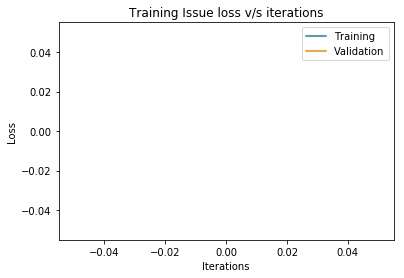

In [87]:
plt.figure()
plt.title('Training Issue loss v/s iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(issue_losses, label = 'Training')
plt.plot(issue_losses, label = 'Validation')
plt.legend()
    
# plt.figure()
# plt.title('Training Label loss v/s iterations')
# plt.xlabel('Iterations')
# #plt.ylabel('Loss')
# plt.plot(label_losses, label = 'Training')
# #plt.plot(val_label_losses, label = 'Validation')
# plt.legend()

In [88]:
issue_losses

[]

In [80]:
def batches_test(batch_size, idx):
  start =  batch_size*idx
  end = start + batch_size
  return x_test[start:end], y_issue_test[start:end], y_label_test[start:end]

def batches_val(batch_size, idx):
  start =  batch_size*idx
  end = start + batch_size
  return x_val[start:end], y_issue_val[start:end], y_label_val[start:end]


def eval(encoder, predictor, hidden_size, batch_size):
  test_num_batches = int(len(x_test)/batch_size)
  issue_criterion = nn.CrossEntropyLoss()
  label_criterion = nn.CrossEntropyLoss()
  
  total_issue_loss = 0
  total_label_loss = 0
  pred_issue = Variable(torch.LongTensor(len(x_test)))
  pred_label = Variable(torch.LongTensor(len(x_test)))
  
  for ei in range(test_num_batches):
      loss_issue = 0
      loss_label = 0
      encoder_hidden = Variable(encoder.H_t0(batch_size))
      input_tensor, y_issue, y_label = batches_test(batch_size, ei)
      #print(y_issue.shape)
      #print(y_label.shape)
      #print(input_tensor.shape)
      
      input_tensor = Variable(torch.LongTensor(input_tensor))
      target_issue = Variable(torch.LongTensor(y_issue)).view(-1)
   
      #print('Target issue: {0}'.format(target_issue.shape))
      
      target_label = Variable(torch.LongTensor(y_label)).view(-1)
      #print('Target label: {0}'.format(target_label.shape))
      
      #print(input_tensor.shape)
      encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
      #print(encoder_hidden.shape)
      #print(encoder_output.shape)
      #encoder_outputs[ei] = encoder_hidden[0]
      
      predictor_input = encoder_hidden.view(-1, hidden_size)
      #print(predictor_input.shape)
      predictor_issue = predictor(predictor_input)
      _, pred_issue = torch.max(predictor_issue, 1)
      #_, pred_label = torch.max(predictor_label, 1)
      
      loss_issue = issue_criterion(predictor_issue, target_issue)
      #loss_label = label_criterion(predictor_label, target_label)
      
      total_issue_loss += loss_issue.data[0]
      #total_label_loss += loss_label.data[0]
      
  print('Test issue loss: {0}, label loss: {1}'.format(total_issue_loss/test_num_batches, total_label_loss/test_num_batches))
  
  print(pred_issue.shape)
  print(target_issue.shape)
  issue_acc = 100*len(pred_issue[pred_issue==target_issue])/len(x_test)
  #label_acc = 100*len(pred_label[pred_label==target_label])/len(x_test)
  
  #print('Test issue acc: {0}, label acc: {1}'.format(issue_acc, label_acc))
  print("Issue accuracy : ",issue_acc)
  
  cf_issue = confusion_matrix(target_issue.data.numpy(), pred_issue.data.numpy())
  #print(cf_issue)
  
  #cf_label = confusion_matrix(target_label.data.numpy(), pred_label.data.numpy())
  #print(cf_label)
  
  from sklearn.metrics import f1_score
  
  print('F1 score')
  print(f1_score(target_issue.data.numpy(), pred_issue.data.numpy(), average='weighted') )
  
  #print(f1_score(target_label.data.numpy(), pred_label.data.numpy(), average='weighted') )
  
  
  return cf_issue#, cf_label
  
  
def validate(encoder, predictor, hidden_size, batch_size):
  val_num_batches = int(len(x_val)/batch_size)
  issue_criterion = nn.CrossEntropyLoss()
  label_criterion = nn.CrossEntropyLoss()
  
  total_issue_loss = 0
  total_label_loss = 0
  pred_issue = Variable(torch.LongTensor(len(x_val)))
  pred_label = Variable(torch.LongTensor(len(x_val)))
  
  for ei in range(val_num_batches):
      loss_issue = 0
      loss_label = 0
      encoder_hidden = Variable(encoder.H_t0(batch_size))
      input_tensor, y_issue, y_label = batches_val(batch_size, ei)
      #print(y_issue.shape)
      #print(y_label.shape)
      #print(input_tensor.shape)
      
      input_tensor = Variable(torch.LongTensor(input_tensor))
      target_issue = Variable(torch.LongTensor(y_issue)).view(-1)
   
      #print('Target issue: {0}'.format(target_issue.shape))
      
      target_label = Variable(torch.LongTensor(y_label)).view(-1)
      #print('Target label: {0}'.format(target_label.shape))
      
      #print(input_tensor.shape)
      encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
      #print(encoder_hidden.shape)
      #print(encoder_output.shape)
      #encoder_outputs[ei] = encoder_hidden[0]
      
      predictor_input = encoder_hidden.view(-1, hidden_size)
      #print(predictor_input.shape)
      predictor_issue= predictor(predictor_input)
      #predictor_issue, predictor_label = predictor(predictor_input)
      _, pred_issue = torch.max(predictor_issue, 1)
      #_, pred_label = torch.max(predictor_label, 1)
      
      loss_issue = issue_criterion(predictor_issue, target_issue)
      #loss_label = label_criterion(predictor_label, target_label)
      
      total_issue_loss += loss_issue.data[0]
      #total_label_loss += loss_label.data[0]
      
  print('Validation issue loss: {0}, label loss: {1}'.format(total_issue_loss/val_num_batches, total_label_loss/val_num_batches))
  
  #print(pred_issue.shape)
  #print(target_issue.shape)
  issue_acc = 100*len(pred_issue[pred_issue==target_issue])/len(x_val)
  #label_acc = 100*len(pred_label[pred_label==target_label])/len(x_val)
  
  print('Validation issue acc: {0}, label acc: {1}'.format(issue_acc, label_acc))
  
  #print(confusion_matrix(target_issue.data.numpy(), pred_issue.data.numpy()))
  #print(confusion_matrix(target_label.data.numpy(), pred_label.data.numpy()))
  
  return total_issue_loss/val_num_batches#, total_label_loss/val_num_batches
    
#eval(encoder, predictor, hidden_size, batch_size=len(x_val))

In [70]:
len(word_counts)

17443

In [71]:
x = Variable(torch.LongTensor(10,3))
print(x.shape)
torch.max(x, 1)

torch.Size([10, 3])


(tensor([    140044211870824,                   0,     140043374330712,
             140043374833480,            10921600, 7234296275584312685,
                   115634736, 3761125135767069748, 4667527276315905455,
         2478159795180681527]), tensor([0, 0, 2, 2, 0, 1, 1, 1, 1, 1]))

In [57]:
l = []
stop_words = ['the','of','in','and','a','is','on','this','all','it','will','for','to','be','with',
              'at','are','u','has','that','by','from', 'as','was','have','its','an','if','been','be','also','should','which']
for i in tweets_:
  x = [word for word in i.split() if word not in stop_words]
  l.append(len(x))
  #print(i.split())
  #break
  
l = np.array(l)


In [58]:
len(l[l==1])

0

In [81]:
cf_issue = eval(encoder, predictor, hidden_size, batch_size=len(x_val))

Test issue loss: 0.20279161632061005, label loss: 0.0
torch.Size([719])
torch.Size([719])
Issue accuracy :  94.86111111111111
F1 score
0.950379642822322


/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:54: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [95]:
cf_issue = eval(encoder, predictor, hidden_size, batch_size=len(x_val))

Test issue loss: 0.18190421164035797, label loss: 0.0
torch.Size([719])
torch.Size([719])
Issue accuracy :  95.41666666666667
F1 score
0.9550366976400535


/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:54: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [97]:
cf_issue = eval(encoder, predictor, hidden_size, batch_size=len(x_val))

Test issue loss: 0.12212206423282623, label loss: 0.0
torch.Size([719])
torch.Size([719])
Issue accuracy :  96.38888888888889
F1 score
0.9649541590356164


/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:54: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [101]:
cf_issue = eval(encoder, predictor, hidden_size, batch_size=len(x_val))

Test issue loss: 0.12212206423282623, label loss: 0.0
torch.Size([719])
torch.Size([719])
Issue accuracy :  96.38888888888889
F1 score
0.9649541590356164


/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:54: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [60]:
encoder = Encoder(vocab_size,hidden_size)
predictor = Predictor(input_size,hidden_size,output_size_issue,output_size_label)
issue_losses, label_losses, val_issue_losse, val_label_losses = training_(encoder, predictor, 5, hidden_size, lr, batch_size)

/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:32: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/bedanta/ml/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


NameError: name 'predict_issue' is not defined

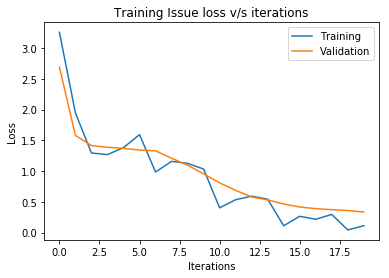

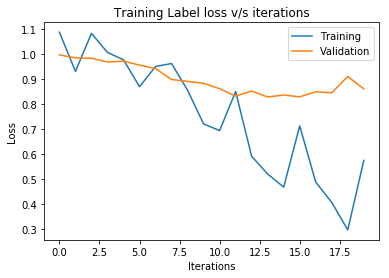

In [49]:
plt.figure()
plt.title('Training Issue loss v/s iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(issue_losses, label = 'Training')
plt.plot(val_issue_losse, label = 'Validation')
plt.legend()
    
plt.figure()
plt.title('Training Label loss v/s iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(label_losses, label = 'Training')
plt.plot(val_label_losses, label = 'Validation')
plt.legend()

In [104]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          which,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    if(which=='issue'):
        plt.savefig('issueF1.eps', format='eps', dpi=100)
    else:
        plt.savefig('stanceF1.eps', format='eps', dpi=1000)
    plt.show()
    return plt

In [102]:
names=['GST',
 'PNB Scam',
 'FDIPolicy',
 'Padmavati film screening',
 'Cauvery SC Verdict',
 'Jallikattu ban',
 'GDP growth',
 'RightToPrivacy SC Verdict',
 'Demonetisation',
 'Swacch Bharat',
 'Aadhar linking',
 'Triple Talaq SC verdict',
 'TripleTalaqBill',
 'lgp price hike',
 'reservation',
 'Beef Ban',
 'Inflation control',
 'nsc and ppf rate cuts',
 'Ram Mandir',
 'EVM tampering',
 'Fodder scam',
 'hike in oil prices',
 'Rohingyas',
 'acchedin']


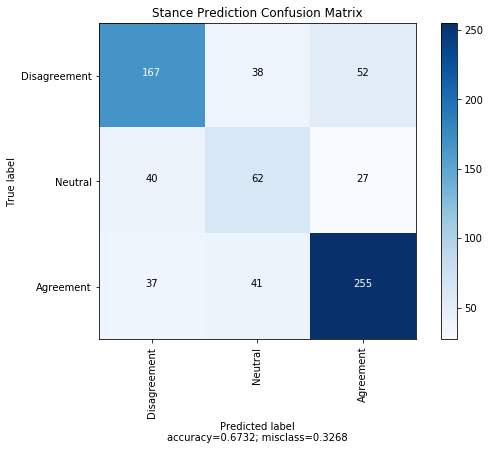

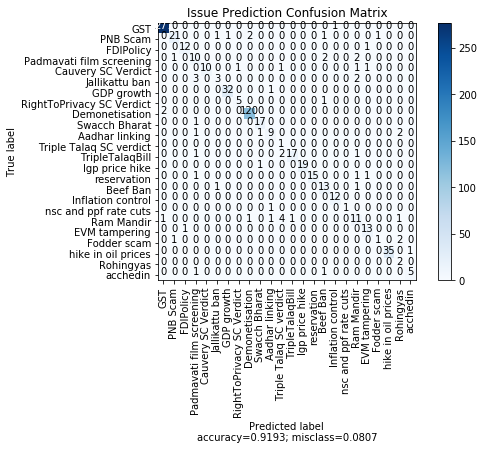

In [73]:
plt1 = plot_confusion_matrix(cm           = cf_label, 
                      normalize    = False,
                      which = 'stance',
                      target_names = ['Disagreement', 'Neutral', 'Agreement'],
                      title        = "Stance Prediction Confusion Matrix")

plt2  = plot_confusion_matrix(cm           = cf_issue, 
                      normalize    = False,
                      which =  'issue',
                      target_names = names,
                              
                      title        = "Issue Prediction Confusion Matrix")

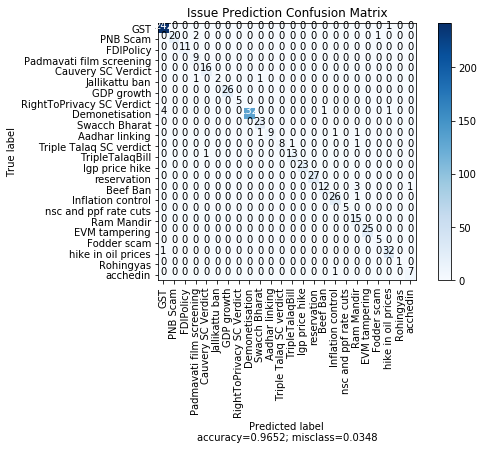

In [105]:
# plt1 = plot_confusion_matrix(cm           = cf_label, 
#                       normalize    = False,
#                       which = 'stance',
#                       target_names = ['Disagreement', 'Neutral', 'Agreement'],
#                       title        = "Stance Prediction Confusion Matrix")

plt2  = plot_confusion_matrix(cm           = cf_issue, 
                      normalize    = False,
                      which =  'issue',
                      target_names = names,
                              
                      title        = "Issue Prediction Confusion Matrix")

In [60]:
plt1.savefig('stanceF1.eps', format='eps', dpi=1000)
plt2.savefig('issueF1.eps',  format='eps', dpi=1000)

<Figure size 432x288 with 0 Axes>

In [44]:
print(vocab_size)

17444
